In [88]:
# %config IPCompleter.greedy=True
# # then click ". + tab "  simultaniously -> intellisense

In [ ]:
#press [SHIFT] and [TAB] from within the method parentheses

In [ ]:
### intellisense - works perfect!!
# pip3 install jupyter-tabnine
# jupyter nbextension install --py jupyter_tabnine
# jupyter nbextension enable --py jupyter_tabnine
# jupyter serverextension enable --py jupyter_tabnine

<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [74]:
import pandas as pd
import numpy as np

In [75]:
df = pd.read_csv('../DATA/fake_reg.csv')


In [76]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

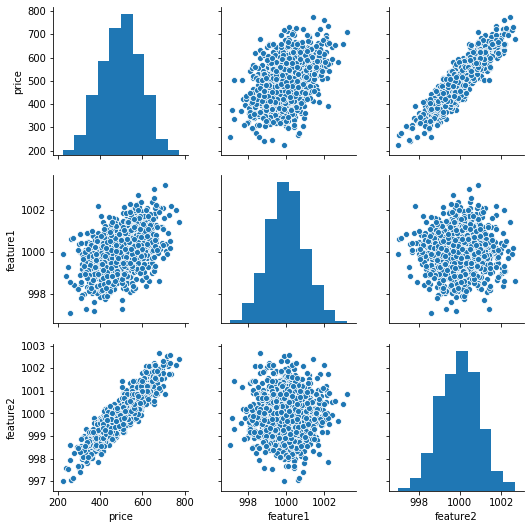

In [78]:
sns.pairplot(df)

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
# # Convert Pandas to Numpy for Keras

# # Features
# X = df[['feature1','feature2']].values

# # Label
# y = df['price'].values

# # Split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [81]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']]

# Label
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [82]:
X_train.shape

(700, 2)

In [83]:
X_test.shape

(300, 2)

In [84]:
y_train.shape

(700,)

In [85]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), de

In [88]:
scaler = MinMaxScaler()

In [89]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [90]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [91]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [92]:
import tensorflow as tf

In [93]:
from tensorflow.keras.models import Sequential

In [94]:
help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense(32))
 |  model.add(Dense(32))
 |  model.com

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [96]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  Example:
 |  
 |  ```python
 |  # as first layer in a sequential model:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(16,)))
 |  # now the model will take as input arrays of shape (*, 16)
 |  # and output arrays of shape (*, 32)
 |  
 |  # after the first layer, you don't need to specify
 |  # the size 

### Model - as a list of layers

In [28]:
model_1 = Sequential([
    Dense(4,activation='relu'), #neuron(dimension of output space), activation func
    Dense(2,activation='relu'),
    Dense(1) 
])

### Model - adding in layers one by one  (preferred method through out the course)


In [32]:
model_2 = Sequential()

model_2.add(Dense(4, activation='relu'))
model_2.add(Dense(2, activation='relu'))
model_2.add(Dense(1))

Let's go ahead and build a simple model and then compile it by defining our solver

In [97]:
model_3 = Sequential()

model_3.add(Dense(4,activation='relu'))
model_3.add(Dense(4,activation='relu'))
model_3.add(Dense(4,activation='relu'))

# Final output node to predict sigle numerical value of price. 
model_3.add(Dense(1)) #single neuron produce some sort of price

#measure prediction against the true price through mean squre, which need to be minimized.
model_3.compile(optimizer='rmsprop',loss='mse')
#this is regression problem(coutinous value), so loss='mse'

### Choosing an optimizer and loss
Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [ ]:
#ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>,
# <class 'pandas.core.series.Series'>
##########
# yes add the code before model.fit() function 
#train_y= np.asarray(train_y) validation_y= np.asarray(validation_y)

In [99]:
import numpy as np
X_train= np.asarray(X_train) 
y_train= np.asarray(y_train)

In [100]:
# model_3.fit(x=X_train, y=y_train, epochs=250, verbose=0) #train X_train 250 times.

In [101]:
model_3.fit(x=X_train, y=y_train, epochs=250) 

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 721us/sample - loss: 256842.8127
Epoch 2/250
700/700 [==============================] - 0s 100us/sample - loss: 256750.9040
Epoch 3/250
700/700 [==============================] - 0s 106us/sample - loss: 256688.9169
Epoch 4/250
700/700 [==============================] - 0s 117us/sample - loss: 256642.9984
Epoch 5/250
700/700 [==============================] - 0s 113us/sample - loss: 256604.0014
Epoch 6/250
700/700 [==============================] - 0s 117us/sample - loss: 256566.4841
Epoch 7/250
700/700 [==============================] - 0s 113us/sample - loss: 256524.7673
Epoch 8/250
700/700 [==============================] - 0s 114us/sample - loss: 256475.1612
Epoch 9/250
700/700 [==============================] - 0s 118us/sample - loss: 256414.5056
Epoch 10/250
700/700 [==============================] - 0s 118us/sample - loss: 256340.9238
Epoch 11/250
700/700 [==============================] - 0s 119us/sam

700/700 [==============================] - 0s 112us/sample - loss: 47799.1203
Epoch 91/250
700/700 [==============================] - 0s 121us/sample - loss: 42995.2387
Epoch 92/250
700/700 [==============================] - 0s 123us/sample - loss: 38320.7782
Epoch 93/250
700/700 [==============================] - 0s 125us/sample - loss: 33798.4089
Epoch 94/250
700/700 [==============================] - 0s 122us/sample - loss: 29491.2481
Epoch 95/250
700/700 [==============================] - 0s 116us/sample - loss: 25404.9116
Epoch 96/250
700/700 [==============================] - 0s 120us/sample - loss: 21541.0763
Epoch 97/250
700/700 [==============================] - 0s 121us/sample - loss: 17993.9606
Epoch 98/250
700/700 [==============================] - 0s 122us/sample - loss: 14757.1051
Epoch 99/250
700/700 [==============================] - 0s 122us/sample - loss: 11807.2441
Epoch 100/250
700/700 [==============================] - 0s 125us/sample - loss: 9241.2955
Epoch 101/25

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [102]:
model_3.history.history

{'loss': [256842.81267857144,
  256750.90401785713,
  256688.916875,
  256642.99839285715,
  256604.00142857144,
  256566.48410714287,
  256524.76732142858,
  256475.16116071428,
  256414.505625,
  256340.9238392857,
  256253.51553571428,
  256153.04678571428,
  256037.07625,
  255904.07651785715,
  255750.1038392857,
  255571.9392857143,
  255368.91375,
  255137.76267857142,
  254879.13008928573,
  254588.7844642857,
  254269.66285714286,
  253916.79589285713,
  253530.05857142858,
  253103.744375,
  252636.54428571428,
  252128.40991071428,
  251576.7807142857,
  250976.22151785714,
  250323.96544642857,
  249617.6205357143,
  248859.55714285714,
  248039.1242857143,
  247158.36517857143,
  246214.97151785714,
  245204.99214285714,
  244131.11794642857,
  242984.35401785714,
  241759.12482142856,
  240459.76714285713,
  239077.65633928572,
  237619.90339285714,
  236077.10008928573,
  234434.57214285716,
  232712.62285714285,
  230896.26125,
  228984.15741071428,
  226974.36741071427

In [103]:
loss_df = pd.DataFrame(model_3.history.history)
loss_df

,loss
0,256842.812679
1,256750.904018
2,256688.916875
3,256642.998393
4,256604.001429
...,...
245,24.217458
246,24.320344
247,24.007197
248,24.466280


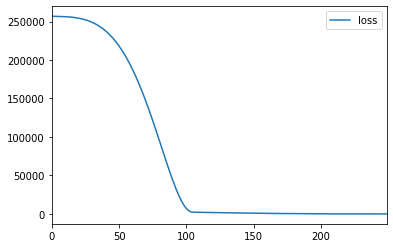

In [104]:
loss_df.plot()

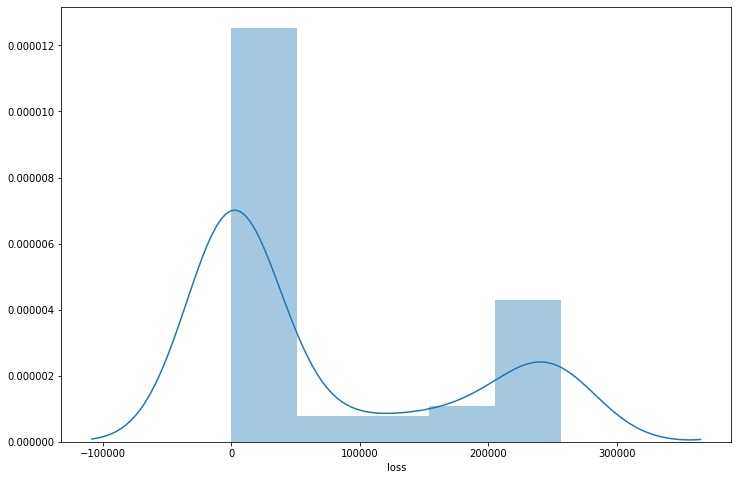

In [106]:
plt.figure(figsize=(12, 8))
sns.distplot(loss_df['loss'])

In [112]:
loss = model_3.history.history['loss']
print(type(loss)) #list
loss

<class 'list'>


[256842.81267857144,
 256750.90401785713,
 256688.916875,
 256642.99839285715,
 256604.00142857144,
 256566.48410714287,
 256524.76732142858,
 256475.16116071428,
 256414.505625,
 256340.9238392857,
 256253.51553571428,
 256153.04678571428,
 256037.07625,
 255904.07651785715,
 255750.1038392857,
 255571.9392857143,
 255368.91375,
 255137.76267857142,
 254879.13008928573,
 254588.7844642857,
 254269.66285714286,
 253916.79589285713,
 253530.05857142858,
 253103.744375,
 252636.54428571428,
 252128.40991071428,
 251576.7807142857,
 250976.22151785714,
 250323.96544642857,
 249617.6205357143,
 248859.55714285714,
 248039.1242857143,
 247158.36517857143,
 246214.97151785714,
 245204.99214285714,
 244131.11794642857,
 242984.35401785714,
 241759.12482142856,
 240459.76714285713,
 239077.65633928572,
 237619.90339285714,
 236077.10008928573,
 234434.57214285716,
 232712.62285714285,
 230896.26125,
 228984.15741071428,
 226974.36741071427,
 224862.21660714285,
 222650.68017857143,
 220341.406

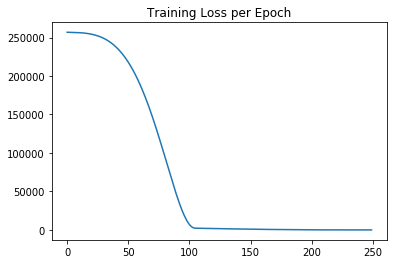

In [110]:
sns.lineplot(x=range(len(loss)),y=loss) #y=loss is list
plt.title("Training Loss per Epoch");

In [138]:
#ValueError: Failed to find data adapter that can handle input:
# <class 'numpy.ndarray'>, <class 'pandas.core.series.Series'>
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

In [139]:
model_3.evaluate(X_test, y_test, verbose=0) #return model's loss on test set. -> root mean square error. 

25.078524373372396

In [140]:
model_3.evaluate(X_train, y_train, verbose=0)

23.93523666381836

In [141]:
#interpreate actual prediction performing. 
#root mean square error vs. mean absolute error

In [142]:
#get actual true prediction
test_predictions= model_3.predict(X_test)
print(test_predictions.shape)


(300, 1)


In [143]:
test_predictions  #numpy array

array([[405.50644],
       [623.2838 ],
       [591.86566],
       [572.26025],
       [367.259  ],
       [579.0706 ],
       [515.3642 ],
       [459.07376],
       [549.3228 ],
       [447.48395],
       [611.54706],
       [548.5128 ],
       [419.31274],
       [409.15872],
       [650.57   ],
       [437.35065],
       [508.16293],
       [659.88947],
       [662.3688 ],
       [565.27136],
       [334.774  ],
       [444.9863 ],
       [382.92212],
       [379.01407],
       [566.48694],
       [610.5438 ],
       [532.38336],
       [427.99612],
       [655.3221 ],
       [414.14548],
       [442.64066],
       [485.1708 ],
       [438.5341 ],
       [681.6218 ],
       [424.7096 ],
       [418.0209 ],
       [501.57004],
       [550.35004],
       [509.9879 ],
       [395.92044],
       [618.2714 ],
       [416.72113],
       [604.17285],
       [445.84695],
       [502.0033 ],
       [581.17914],
       [668.37274],
       [490.30258],
       [318.82874],
       [485.50357],


In [144]:
test_predictions = pd.Series(test_predictions.reshape(300,)) #reshape to 1d array(pandas Series array)
print(test_predictions.shape)
test_predictions #pandas Series instead of numpy array

(300,)


0      405.506439
1      623.283813
2      591.865662
3      572.260254
4      367.259003
          ...    
295    529.146301
296    515.868164
297    609.387207
298    416.985779
299    411.211395
Length: 300, dtype: float32

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [148]:
model_3.metrics_names

['loss']

In [149]:
training_score = model_3.evaluate(X_train,y_train,verbose=0)
test_score = model_3.evaluate(X_test,y_test,verbose=0)

In [150]:
training_score

23.93523666381836

In [32]:
test_score

26.798187001546225

### Further Evaluations

In [164]:
test_predictions = model_3.predict(X_test)
print(test_predictions.shape)

(300, 1)


In [165]:
test_predictions #numpy array

array([[405.50644],
       [623.2838 ],
       [591.86566],
       [572.26025],
       [367.259  ],
       [579.0706 ],
       [515.3642 ],
       [459.07376],
       [549.3228 ],
       [447.48395],
       [611.54706],
       [548.5128 ],
       [419.31274],
       [409.15872],
       [650.57   ],
       [437.35065],
       [508.16293],
       [659.88947],
       [662.3688 ],
       [565.27136],
       [334.774  ],
       [444.9863 ],
       [382.92212],
       [379.01407],
       [566.48694],
       [610.5438 ],
       [532.38336],
       [427.99612],
       [655.3221 ],
       [414.14548],
       [442.64066],
       [485.1708 ],
       [438.5341 ],
       [681.6218 ],
       [424.7096 ],
       [418.0209 ],
       [501.57004],
       [550.35004],
       [509.9879 ],
       [395.92044],
       [618.2714 ],
       [416.72113],
       [604.17285],
       [445.84695],
       [502.0033 ],
       [581.17914],
       [668.37274],
       [490.30258],
       [318.82874],
       [485.50357],


In [166]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [167]:
test_predictions #pandas Series

0      405.506439
1      623.283813
2      591.865662
3      572.260254
4      367.259003
          ...    
295    529.146301
296    515.868164
297    609.387207
298    416.985779
299    411.211395
Length: 300, dtype: float32

In [168]:
pred_df = pd.DataFrame(y_test,columns=['Test true Y'])

In [169]:
pred_df

,Test true Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [170]:
pred_df = pd.concat([pred_df, test_predictions], axis=1) #conacte with dafaframe and Series
pred_df

,Test true Y,0
0,402.296319,405.506439
1,624.156198,623.283813
2,582.455066,591.865662
3,578.588606,572.260254
4,371.224104,367.259003
...,...,...
295,525.704657,529.146301
296,502.909473,515.868164
297,612.727910,609.387207
298,417.569725,416.985779


In [172]:
pred_df.columns = ['Test Y','Model Predictions']

In [173]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.506439
1,624.156198,623.283813
2,582.455066,591.865662
3,578.588606,572.260254
4,371.224104,367.259003
...,...,...
295,525.704657,529.146301
296,502.909473,515.868164
297,612.727910,609.387207
298,417.569725,416.985779


Let's compare to the real test labels!

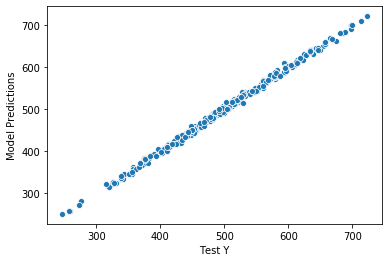

In [174]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [175]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

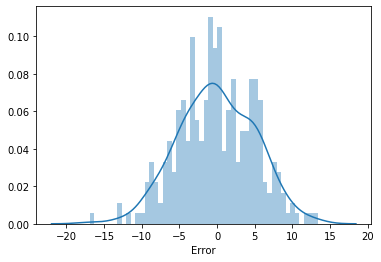

In [178]:
sns.distplot(pred_df['Error'],bins=50)

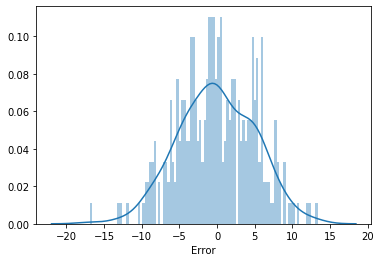

In [177]:

sns.distplot(pred_df['Error'],bins=100)

In [179]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [180]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])
# 4 off from mean(498.673029), which is around 10% off from mean value, which is good mean absolute error. 
# and in scatter plot , almost perfect straint line. ->
# model is performing very well predicting the price fo gemstone based on two features.

4.02420826969178

In [181]:
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


In [184]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [186]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])
#same as below !!

25.07852803145015

In [187]:
model_3.evaluate(X_test, y_test, verbose=0) #return model's loss on test set. -> mean squared error. 
#loss for the model is mean squared error

25.078524373372396

In [188]:
#root mean squared error 
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])**0.5

5.00784664615942

In [189]:
# Essentially the same thing, difference just due to precision
test_score

25.078524373372396

In [190]:
#RMSE
test_score**0.5

5.007846280924804

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [191]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [192]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [193]:
new_gem = scaler.transform(new_gem)

In [195]:
model_3.predict(new_gem)

array([[420.19]], dtype=float32)

## Saving and Loading a Model

In [196]:
from tensorflow.keras.models import load_model

In [199]:
model_3.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [200]:
later_model = load_model('my_model.h5')

In [201]:
later_model.predict(new_gem)

array([[420.19]], dtype=float32)